In [167]:
import pandas as pd
import numpy as np

import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

import dtale
import pywedge as pw

from altair import Chart, X, Y, repeat
from common import display_side_by_side

In [26]:
df = pd.DataFrame({
    "Unit_Test_Marks" : [23, 20, 19, 17],
    "Terminal_Marks" : [43, 42, 42, 41],
    "Performance" : ["A+", "A",None, "B"],
    "Gender" : ["F", "M", "F","M"],
    "Final_Marks" : [97, 93, 90, 86]
})

target_col = ["Final_Marks"]

copy = df.copy()

# EDA

## Overview

In [12]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unit_Test_Marks  4 non-null      int64 
 1   Terminal_Marks   4 non-null      int64 
 2   Performance      3 non-null      object
 3   Gender           4 non-null      object
 4   Final_Marks      4 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 288.0+ bytes


None

In [13]:
df.describe()

,Unit_Test_Marks,Terminal_Marks,Final_Marks
count,4.00,4.000000,4.000000
mean,19.75,42.000000,91.500000
std,2.50,0.816497,4.654747
min,17.00,41.000000,86.000000
25%,18.50,41.750000,89.000000
50%,19.50,42.000000,91.500000
75%,20.75,42.250000,94.000000
max,23.00,43.000000,97.000000


In [67]:
cat_cols = df.select_dtypes(exclude=np.number)
for col in cat_cols.columns:
    print(col)
    
    vc = pd.DataFrame(cat_cols[col].value_counts(dropna=False,normalize=True))
    vc.columns = ["% Count"]
    vc.sort_values("% Count",ascending=False)
    print(f"No of unique categories : {len(vc)}")
    display(vc.head(7))

Performance
No of unique categories : 4


,% Count
B,0.25
A+,0.25
A,0.25
NaN,0.25


Gender
No of unique categories : 2


,% Count
F,0.5
M,0.5


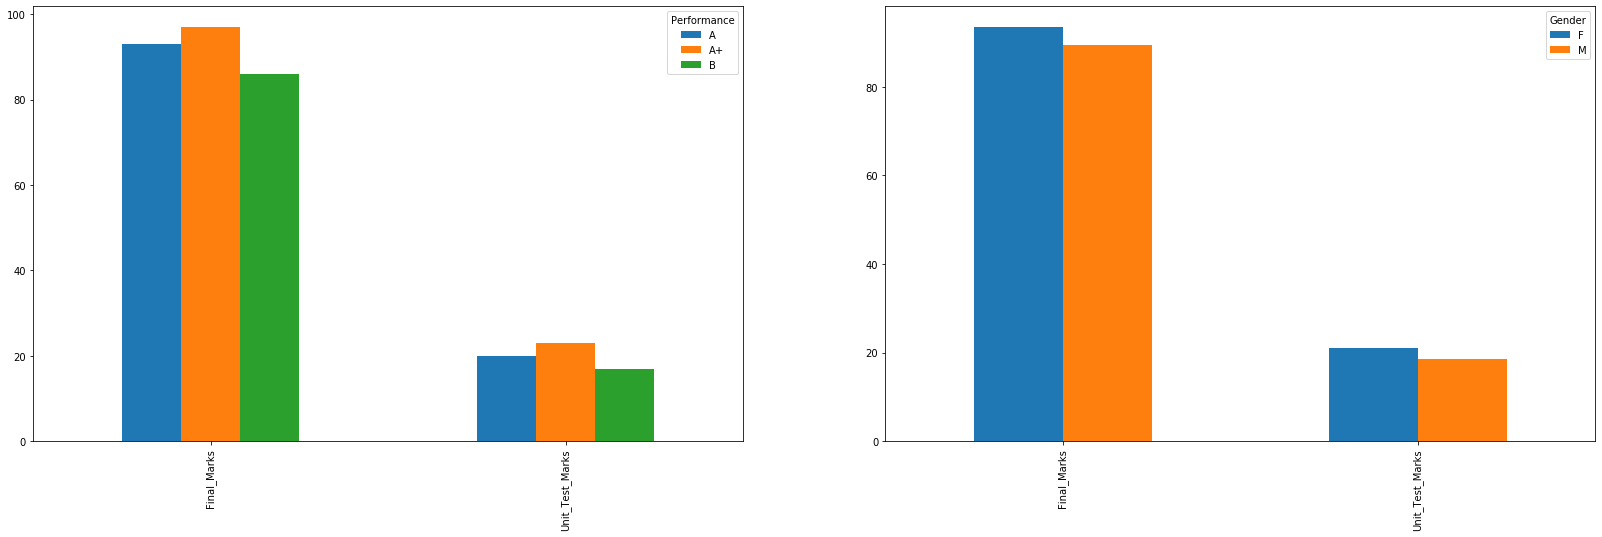

In [110]:
num_rows = int(np.ceil(len(cat_cols.columns) / 2))

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(28,num_rows*8))
ax= axes.flatten()
for index,col in enumerate(cat_cols.columns,0):
    axes = ax[index]
    pd.pivot_table(df,columns=[col],values=["Unit_Test_Marks","Final_Marks"],aggfunc="median").plot(kind="bar",ax=axes)
  

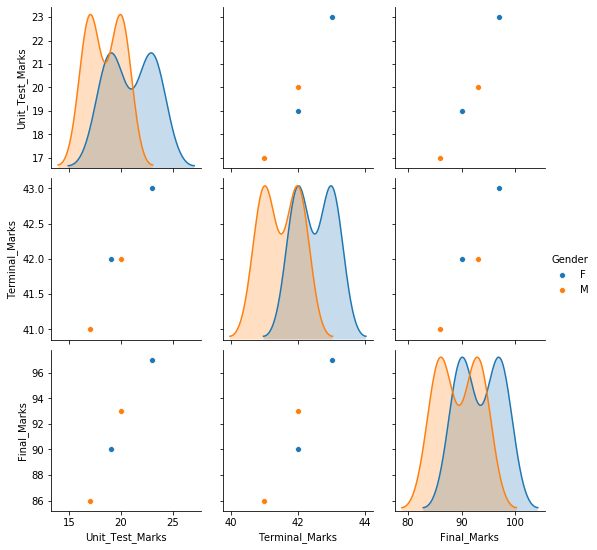

In [111]:
sns.pairplot(df,hue="Gender")

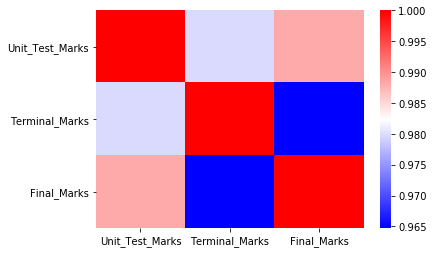

In [16]:
sns.heatmap(df.corr(),cmap="bwr")

In [24]:
dtale.show(df,ignore_duplicate=True)

In [21]:
mc=pw.Pywedge_Charts(df.dropna(),c=None,y="Final_Marks")
charts = mc.make_charts();

HTML(value='<h2>Pywedge Make_Charts </h2>')

HTML(value='<h4><em>Charts compiled by Pywedge make_charts </em></h4>')

## Discrete Target

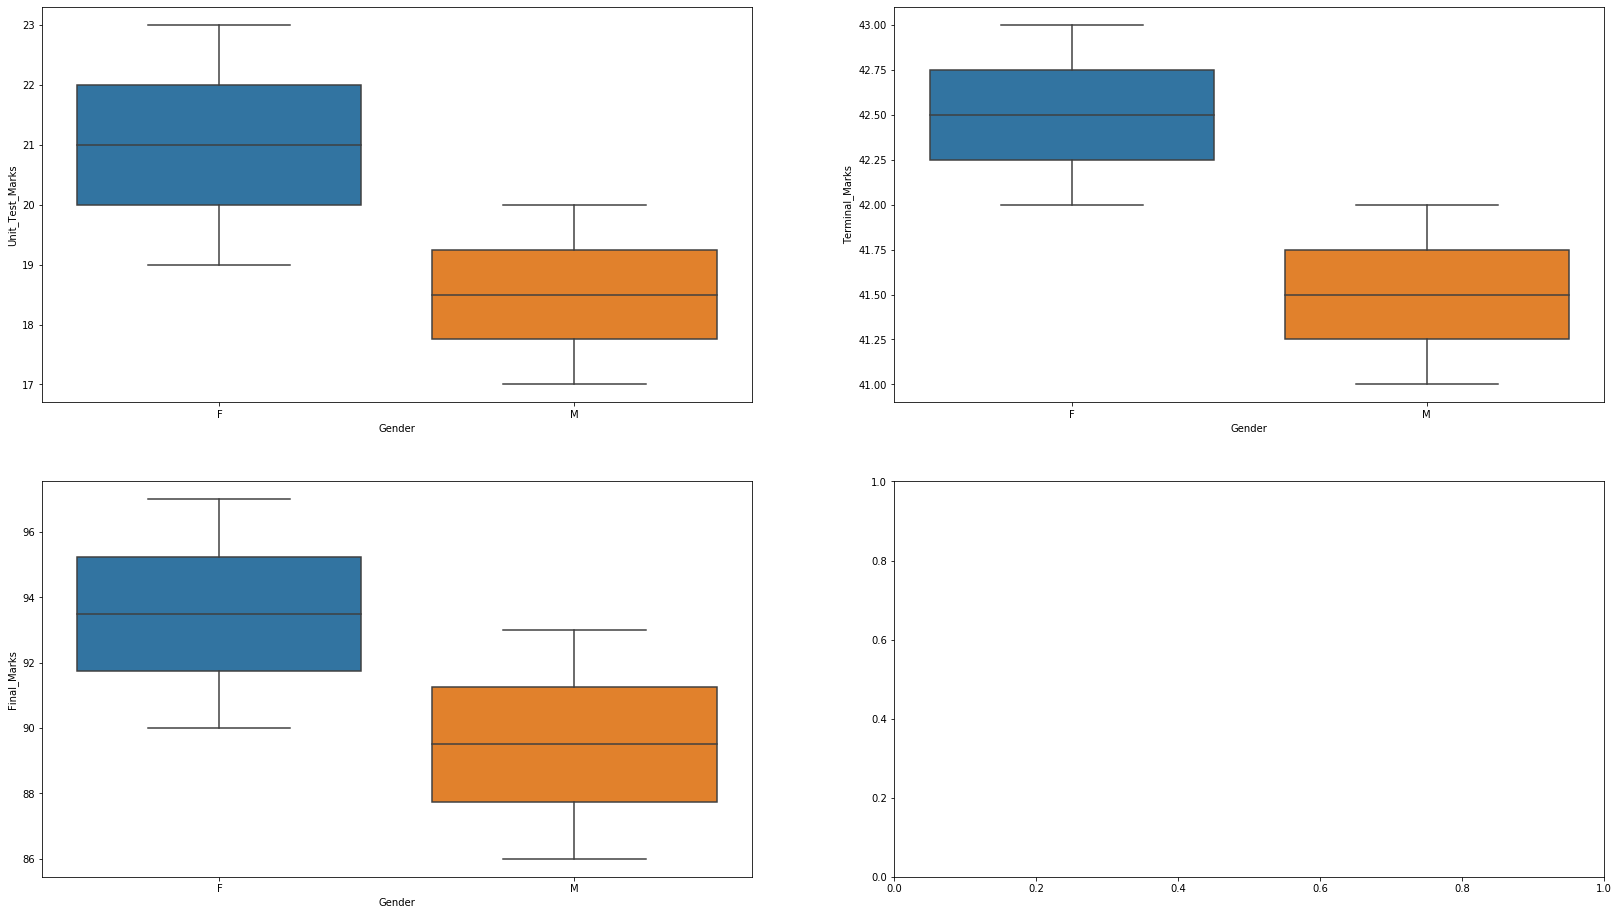

In [107]:
target_col = "Gender"
num_cols = df.select_dtypes(include=np.number)

num_rows = int(np.ceil(len(num_cols.columns) / 2))

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(28,num_rows*8))
ax= axes.flatten()
for index,col in enumerate(num_cols.columns,0):
    axes = ax[index]
    sns.boxplot(data=df,x=target_col,y=col,ax=axes,)
  

In [172]:
cat_cols_names = list(set(cat_cols.columns).difference(set([target_col])))
dfs = []
for index,col in enumerate(cat_cols_names,0):
    a = pd.DataFrame(df.groupby("Gender")[col].value_counts(dropna=False,normalize=True))
    a.columns=["% Count"]
    dfs.append(a)

In [173]:
display_side_by_side(*dfs)

% Count 
 
 
 Gender 
 Performance 
 
 
 
 
 
 F 
 NaN 
 0.5 
 
 
 A+ 
 0.5 
 
 
 M 
 A 
 0.5 
 
 
 B 
 0.5

## Continuous Target

### Normality Test

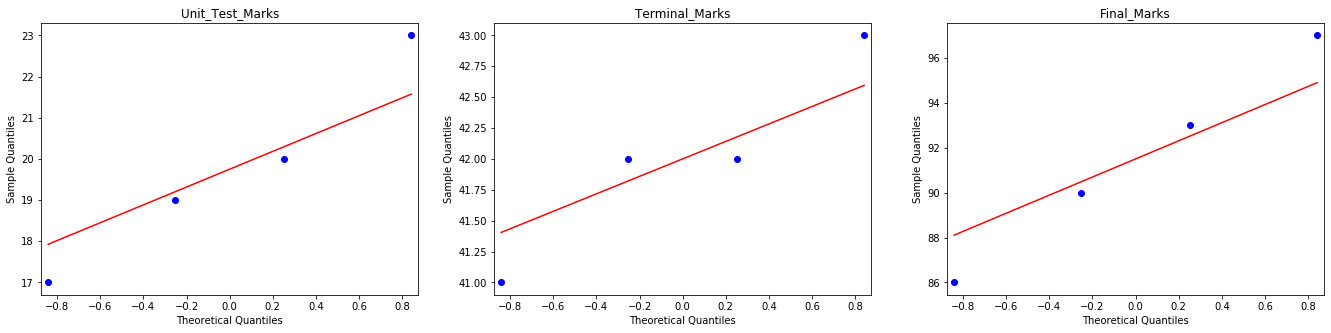

In [22]:
numeric= df.select_dtypes(include=[int,float])
num_numeric_cols = numeric.shape[1]
num_rows = int(np.ceil(num_numeric_cols / 3))

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(23,5))
ax= axes.flatten()
for index,col in enumerate(numeric.columns,0):
    axes = ax[index]
    axes.set_title(col)
    qqplot(numeric[col], line='s',ax=axes)
    

# Feature Engineering